<a href="https://colab.research.google.com/github/lotannamoldon/Portfolio-Projects/blob/main/loan_eligibility_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
pd.read_csv('loan_test.csv')
pd.read_csv('loan_train.csv')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
# Load the training data
train_df = pd.read_csv('loan_train.csv')
# Load the testing data
test_df = pd.read_csv('loan_test.csv')
# Display information about the training set
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Display information about the training set
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
test_df.isnull().sum()


,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [ ]:
train_df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# fill missing training data for both categorical and numerical attributes using mode and median respectively
train_df['LoanAmount'] = train_df['LoanAmount'].fillna(train_df['LoanAmount'].median())
train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].median())
train_df['Credit_History'] = train_df['Credit_History'].fillna(train_df['Credit_History'].median())
train_df['Gender'] = train_df['Gender'].fillna(train_df['Gender'].mode()[0])
train_df['Married'] = train_df['Married'].fillna(train_df['Married'].mode()[0])
train_df['Dependents'] = train_df['Dependents'].fillna(train_df['Dependents'].mode()[0])
train_df['Self_Employed'] = train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0])



In [ ]:
train_df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
# fill missing test data for both categorical and numerical attributes using mode and median respectively
test_df['LoanAmount'] = test_df['LoanAmount'].fillna(test_df['LoanAmount'].median())
test_df['Loan_Amount_Term'] = test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].median())
test_df['Credit_History'] = test_df['Credit_History'].fillna(test_df['Credit_History'].median())
test_df['Gender'] = test_df['Gender'].fillna(train_df['Gender'].mode()[0])
test_df['Dependents'] = test_df['Dependents'].fillna(test_df['Dependents'].mode()[0])
test_df['Self_Employed'] = test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0])



In [ ]:
test_df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
# encoding categorical data so the model recoginizes the data
train_df['Gender'] = train_df['Gender'].replace({'Male': 1, 'Female': 0})
test_df['Gender'] = test_df['Gender'].replace({'Male': 1, 'Female': 0})
train_df['Married'] = train_df['Married'].replace({'Yes': 1, 'No': 0})
test_df['Married'] = test_df['Married'].replace({'Yes': 1, 'No': 0})
train_df['Education'] = train_df['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
test_df['Education'] = test_df['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
train_df['Self_Employed'] = train_df['Self_Employed'].replace({'Yes': 1, 'No': 0})
test_df['Self_Employed'] = test_df['Self_Employed'].replace({'Yes': 1, 'No': 0})
train_df['Property_Area'] = train_df['Property_Area'].replace({'Urban': 2, 'Semiurban': 1, 'Rural': 0})
test_df['Property_Area'] = test_df['Property_Area'].replace({'Urban': 2, 'Semiurban': 1, 'Rural': 0})
train_df['Loan_Status'] = train_df['Loan_Status'].replace({'Y': 1, 'N': 0})


/tmp/ipython-input-713756884.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Gender'] = train_df['Gender'].replace({'Male': 1, 'Female': 0})
/tmp/ipython-input-713756884.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['Gender'] = test_df['Gender'].replace({'Male': 1, 'Female': 0})
/tmp/ipython-input-713756884.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 62.5+ KB


In [ ]:
train_df['Dependents'].value_counts()

,count
Dependents,
0,360
1,102
2,101
3+,51


In [ ]:
# loan ID is givng us issues but we technically do not need it to train the model so we drop it

train_df = train_df.drop('Loan_ID', axis=1)
test_df = test_df.drop('Loan_ID', axis=1)

In [ ]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 57.7+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int64  
 1   Married            367 non-null    int64  
 2   Dependents         367 non-null    object 
 3   Education          367 non-null    int64  
 4   Self_Employed      367 non-null    int64  
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 31.7+ KB


In [ ]:
# Replace '3+' with 3 in dependents
train_df['Dependents'] = train_df['Dependents'].replace('3+', 3)
test_df['Dependents'] = test_df['Dependents'].replace('3+', 3)



In [ ]:
# Convert the column to numeric type
train_df['Dependents'] = pd.to_numeric(train_df['Dependents'])
test_df['Dependents'] = pd.to_numeric(test_df['Dependents'])

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [ ]:
print(test_df.duplicated().sum())
print(train_df.duplicated().sum())

1
0


In [ ]:
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

<Axes: xlabel='Loan_Status', ylabel='count'>

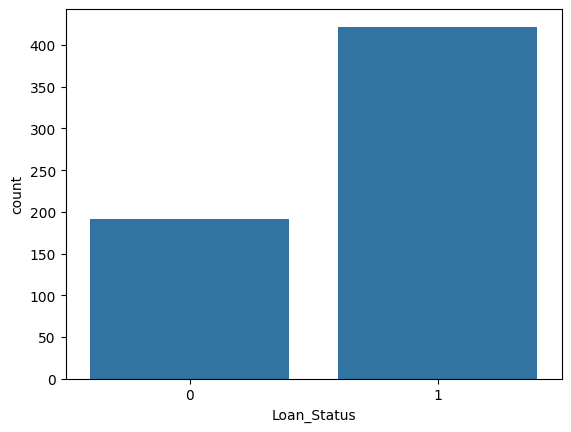

In [ ]:
# we plot the loan status of the the count so we can visualize the No and Yes attributes in the loan status column, yes is represented with 1 after encoding and No with 0
sns.countplot(x='Loan_Status', data=train_df)

In [ ]:
# Model Development (splitting data iand sperating features for training the model)

# 1. Initialize the Random Forest model
# random_state=42 ensures we get the same results every time
model = RandomForestClassifier(random_state=42)

# 2. Separate Features (X) and Target (y) the model will analyse the (X) and will mathematically match uts output with our Target (Y)
# X includes everything EXCEPT the target
X = train_df.drop('Loan_Status', axis=1)
# y is ONLY the target
y = train_df['Loan_Status']

# 3. Split the training data into a "Training Set" and a "Validation Set"
# We use 80% to train and 20% to validate our work.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data successfully split!")
print(f"Training shapes: X={X_train.shape}, y={y_train.shape}")
print(f"Validation shapes: X={X_val.shape}, y={y_val.shape}")


Data successfully split!
Training shapes: X=(491, 11), y=(491,)
Validation shapes: X=(123, 11), y=(123,)


In [ ]:

# Train the model on the training data
model.fit(X_train, y_train)

print("Model training complete!")



Model training complete!


In [ ]:
# Evaluate Performance

# 1. Make predictions on the validation set
y_pred_val = model.predict(X_val)

# 2. Calculate accuracy
accuracy = accuracy_score(y_val, y_pred_val)

print(f"Validation Accuracy: {accuracy:.2%}")


Validation Accuracy: 76.42%


In [ ]:
# Generating predictions (testing our trained model on the test data to get there loan status)
# 1. predict the Loan_Status for the test data
final_predictions = model.predict(test_df)

# 2. Look at the first 10 predictions (0 means No, 1 means Yes)
print(final_predictions[:50])

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
